# Grocery Insights 2.0: Instacart Data Unveiled 

Instacart lets people order groceries online and have them delivered to their doorsteps. This project is all about understanding how people use Instacart to shop for groceries. We are diving into the data behind Instacart to see what patterns and trends we can find. The data we are using is a modified version of what Instacart shared for a Kaggle competition in 2017. Our goal is to learn interesting things about how people use Instacart. By looking at the data and cleaning it up, we want to figure out what Instacart customers like to buy, when they buy, and any other cool insights we can find. #introduction

In [1]:
import pandas as pd

orders = '/datasets/instacart_orders.csv'

df = pd.read_csv(orders, delimiter=';', header=0)#header=0 indicates that the first row contains the column names.

In [2]:
import pandas as pd

products = '/datasets/products.csv'

df_products = pd.read_csv(products, delimiter=';', header=0)

In [3]:
import pandas as pd

aisles = '/datasets/aisles.csv'

df_aisles = pd.read_csv(aisles, delimiter=';', header=0)

In [4]:
import pandas as pd

departments = '/datasets/departments.csv'

df_departments = pd.read_csv(departments, delimiter=';', header=0)

In [5]:
import pandas as pd

order_products = '/datasets/order_products.csv'

df_order_products = pd.read_csv(order_products, delimiter=';', header=0)

df_order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [6]:
duplicated_orders = df[df.duplicated(subset='order_id', keep=False)]# Check for duplicated orders


In [7]:
wednesday_2am_orders = df[(df['order_dow'] == 2) & (df['order_hour_of_day'] == 2)]# Check for all orders placed Wednesday at 2:00 AM


In [8]:
df_no_duplicates = df.drop_duplicates(subset='order_id')# Remove duplicate orders


In [9]:
remaining_duplicates = df_no_duplicates[df_no_duplicates.duplicated()]# Double check for duplicate rows


In [10]:
remaining_order_id_duplicates = df[df.duplicated(subset='order_id', keep=False)]# Double check for duplicate order IDs only


 duplicated orders based on the 'order_id' column the keep=False parameter ensures that all occurrences of duplicated orders are marked as True. To check for all orders placed on Wednesday at 2:00 AM in your DataFrame, you'll need to ensure that the 'order_dow' column represents the day of the week and the 'order_hour_of_day' column represents the hour of the day.The code assumes that 'order_dow' is coded from 0 to 6 (Sunday to Saturday) and 'order_hour_of_day' is coded from 0 to 23. To remove duplicate orders from your DataFrame, you can use the drop_duplicates method. This code creates a new DataFrame df_no_duplicates that contains only the first occurrence of each order (based on the 'order_id'). To double-check for duplicate rows in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method after removing duplicates. This code checks for any remaining duplicates in the DataFrame df_no_duplicates after removing duplicates based on the 'order_id'.If you want to double-check for duplicate order IDs only and ensure that no duplicates remain, you can use the duplicated() method specifically for the 'order_id' column. This code checks for any remaining duplicate order IDs in the DataFrame after removing duplicates based on the 'order_id'



### `products` data frame

In [11]:
duplicate_rows = df_products[df_products.duplicated()]# Check for fully duplicate rows


In [12]:
duplicate_product_ids = df_products[df_products.duplicated(subset=['product_id'])]# Check for just duplicate product IDs


In [13]:
df_products['product_name_lower'] = df_products['product_name'].str.lower()
duplicate_product_names = df_products[df_products['product_name_lower'].duplicated()]
# Check for just duplicate product names (convert names to lowercase to compare better)


In [14]:
df_products_cleaned = df_products.dropna(subset=['product_name']).copy()
df_products_cleaned.loc[:, 'product_name_lower'] = df_products_cleaned['product_name'].str.lower()
duplicate_product_names = df_products_cleaned[df_products_cleaned['product_name_lower'].duplicated()]# Check for duplicate product names that aren't missing


To check for fully duplicate rows in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method. This code checks for any remaining fully duplicate rows in the DataFrame df_products. To check for duplicate product IDs in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method specifically for the 'product_id' column. This code checks for any remaining duplicate product IDs in the DataFrame after removing duplicates based on the 'product_id'. To check for duplicate product names (ignoring case) in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method after converting the names to lowercase. This code adds a new column product_name_lower to the DataFrame with the product names converted to lowercase. It then checks for any remaining duplicate product names in the DataFrame after removing duplicates based on the lowercase product names. To check for duplicate product names (ignoring case) that are not missing in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method after converting the names to lowercase and filtering out missing values. This code first drops rows with missing product names and then adds a new column product_name_lower to the DataFrame with the product names converted to lowercase. It then checks for any remaining duplicate product names in the cleaned DataFrame after removing duplicates based on the lowercase product names.

### `departments` data frame

In [15]:
remaining_duplicates = df_departments[df_departments.duplicated(keep=False)]

In [16]:
tricky_duplicates = df_departments[df_departments.duplicated()]

To check for fully duplicate rows (excluding rows with missing values) in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method with the keep parameter set to False. This code checks for any remaining fully duplicate rows (excluding rows with missing values) in the DataFrame df_departments. 
To double-check for any other tricky duplicates and thoroughly inspect the data, you can use the duplicated() method without specifying the keep parameter. This will keep the first occurrence of a duplicated row and mark subsequent occurrences as duplicates. This code checks for any tricky duplicates in the DataFrame df_departments by identifying rows that have already appeared.

### `aisles` data frame

In [17]:
remaining_duplicates = df_aisles[df_aisles.duplicated(keep=False)]

In [18]:
tricky_duplicates = df_aisles[df_aisles.duplicated()]

To check for fully duplicate rows in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method. This code checks for any remaining fully duplicate rows in the DataFrame df_aisles. To double-check for any other tricky duplicates and thoroughly inspect the data, you can use the duplicated() method without specifying the keep parameter. This will keep the first occurrence of a duplicated row and mark subsequent occurrences as duplicates. This code checks for any tricky duplicates in the DataFrame df_aisles by identifying rows that have already appeared.

### `order_products` data frame

In [19]:
remaining_duplicates = df_order_products[df_order_products.duplicated(keep=False)]# Check for fullly duplicate rows


In [20]:
tricky_duplicates = df_order_products[df_order_products.duplicated()]# Double check for any other tricky duplicates


To check for fully duplicate rows in your DataFrame and ensure that no duplicates remain, you can use the duplicated() method. This code checks for any remaining fully duplicate rows in the DataFrame df_order_products. To double-check for any other tricky duplicates and thoroughly inspect the data, you can use the duplicated() method without specifying the keep parameter. This will keep the first occurrence of a duplicated row and mark subsequent occurrences as duplicates. This code checks for any tricky duplicates in the DataFrame df_order_products by identifying rows that have already appeared.

## Find and remove missing values


### `products` data frame

In [21]:
missing_values = df_products.isnull().sum()
df_products_cleaned = df_products.dropna()

In [22]:
missing_product_names_aisle_100 = df_products[(df_products['product_name'].isnull()) & (df_products['aisle_id'] == 100)]
# Are all of the missing product names associated with aisle ID 100?


In [23]:
missing_product_names_department_21 = df_products[(df_products['product_name'].isnull()) & (df_products['department_id'] == 21)]# Are all of the missing product names associated with department ID 21?


In [24]:
unique_aisles = df_products['aisle_id'].unique()
unique_departments = df_products['department_id'].unique()# What is this ailse and department?


In [25]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')# Fill missing product names with 'Unknown'


To find and remove missing values from your DataFrame df_products, you can use the dropna() method. This code first identifies columns with missing values and displays the count of missing values for each column. Then, it removes rows containing missing values using the dropna() method, creating a new DataFrame df_products_cleaned. To check if all missing product names are associated with aisle ID 100, you can filter the DataFrame based on the condition where the product names are missing (NaN) and the aisle ID is 100. This code creates a DataFrame missing_product_names_aisle_100 that contains rows where product names are missing, and the aisle ID is 100. To check if all missing product names are associated with department ID 21, you can filter the DataFrame based on the condition where the product names are missing (NaN) and the department ID is 21. This code creates a DataFrame missing_product_names_department_21 that contains rows where product names are missing, and the department ID is 21. To understand the "aisle" and "department" information in the provided df_products DataFrame, you can inspect the unique values in the "aisle_id" and "department_id" columns. This will give you an idea of the numerical identifiers and their corresponding categories. Inspecting the unique values in these columns will give you an understanding of the categories and departments to which each product belongs. To fill missing product names with 'Unknown' in your df_products DataFrame, you can use the fillna method. This code fills the missing values in the "product_name" column with the string 'Unknown'.

### `orders` data frame

In [26]:
missing_values = df.isnull().sum()
df_cleaned = df.dropna()

In [27]:
not_first_order = df[df['order_number'] > 1]
missing_values_not_first_order = not_first_order.isnull().sum()# Are there any missing values where it's not a customer's first order?


To find and remove missing values from your df DataFrame, you can use the dropna() method. This code first identifies columns with missing values and displays the count of missing values for each column. Then, it removes rows containing missing values using the dropna() method, creating a new DataFrame df_cleaned. To check for missing values specifically in rows where it's not a customer's first order, you can filter the DataFrame based on the condition where the 'order_number' is greater than 1, indicating it's not the first order. This code first filters the DataFrame to include only rows where it's not a customer's first order. Then, it identifies columns with missing values in the filtered DataFrame and displays the count of missing values for each column.

### `order_products` data frame

In [28]:
missing_values = df_order_products.isnull().sum()
df_order_products_cleaned = df_order_products.dropna()


In [29]:
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()# What are the min and max values in this column?


In [30]:
orders_with_missing_values = df_order_products[df_order_products['add_to_cart_order'].isnull()]
unique_order_ids_with_missing_values = orders_with_missing_values['order_id'].unique()# Save all order IDs with at least one missing value in 'add_to_cart_order'


In [31]:
orders_with_missing_values = df_order_products[df_order_products['add_to_cart_order'].isnull()]
orders_grouped = df_order_products[df_order_products['order_id'].isin(orders_with_missing_values['order_id'])].groupby('order_id')['product_id'].count()
all_orders_more_than_64_products = all(orders_grouped > 64)# Do all orders with missing values have more than 64 products?



In [32]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)# Replace missing values with 999 and convert column to integer type


To find and remove missing values from your df_order_products DataFrame, you can use the dropna() method. This code first identifies columns with missing values and displays the count of missing values for each column. Then, it removes rows containing missing values using the dropna() method, creating a new DataFrame df_order_products_cleaned. To find the minimum and maximum values in a specific column of your DataFrame, you can use the min() and max() methods. Run this code, and it will display the minimum and maximum values in the specified column. To save all order IDs with at least one missing value in the 'add_to_cart_order' column, you can filter the DataFrame to include only the rows where there is a missing value in that column and then extract the unique order IDs. This code creates a DataFrame orders_with_missing_values by filtering rows with missing values in the 'add_to_cart_order' column. It then extracts the unique order IDs from that DataFrame. To check if all orders with missing values in the 'add_to_cart_order' column have more than 64 products, you can filter the DataFrame based on the condition of missing values and then check the count of products for each order. This code checks if, for each order with missing values, the count of products (unique product IDs) is greater than 64. The result is a boolean value indicating whether all orders with missing values have more than 64 products. To replace missing values in the 'add_to_cart_order' column with 999 and convert the column to an integer type, you can use the fillna method along with the astype method. This code replaces missing values in the 'add_to_cart_order' column with 999 using fillna(999) and then converts the entire column to an integer type using astype(int).

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
valid_order_hour_of_day = all((0 <= df['order_hour_of_day']) & (df['order_hour_of_day'] <= 23))

In [34]:
valid_order_dow = all((0 <= df['order_dow']) & (df['order_dow'] <= 6))

### [A2] What time of day do people shop for groceries?

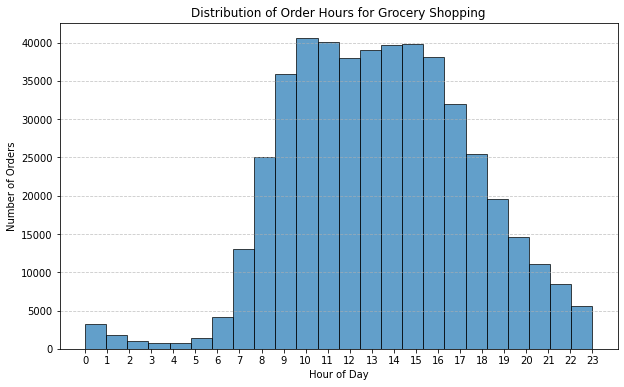

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
orders = '/datasets/instacart_orders.csv'
df = pd.read_csv(orders, delimiter=';', header=0)
plt.figure(figsize=(10, 6))
plt.hist(df['order_hour_of_day'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Order Hours for Grocery Shopping')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To verify that the 'order_hour_of_day' and 'order_dow' values in the 'orders' DataFrame are sensible, you can use boolean conditions to check if the values fall within the expected ranges. This code checks if all 'order_hour_of_day' values are within the range [0, 23] and if all 'order_dow' values are within the range [0, 6]. To analyze what time of day people shop for groceries based on the 'order_hour_of_day' column in the 'orders' DataFrame, you can create a histogram of the order hours. This will give you a distribution of shopping times throughout the day. This code uses Matplotlib to create a histogram with 24 bins (one for each hour of the day) based on the 'order_hour_of_day' column. The x-axis represents the hour of the day, and the y-axis represents the number of orders during each hour.

### [A3] What day of the week do people shop for groceries?

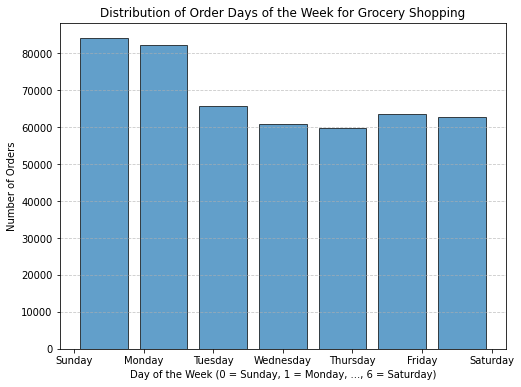

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(df['order_dow'], bins=7, edgecolor='black', alpha=0.7, rwidth=0.8)
plt.title('Distribution of Order Days of the Week for Grocery Shopping')
plt.xlabel('Day of the Week (0 = Sunday, 1 = Monday, ..., 6 = Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To analyze what day of the week people shop for groceries based on the 'order_dow' (day of the week) column in the 'orders' DataFrame, you can create a histogram to visualize the distribution of orders across different days. This code uses Matplotlib to create a histogram with 7 bins (one for each day of the week) based on the 'order_dow' column. The x-axis represents the days of the week, and the y-axis represents the number of orders on each day.

### [A4] How long do people wait until placing another order?

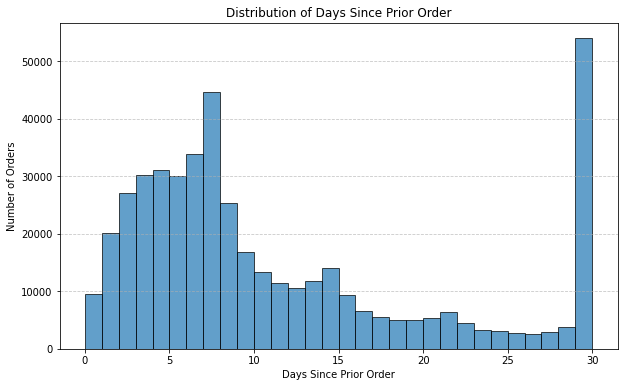

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df['days_since_prior_order'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To analyze how long people wait until placing another order based on the 'days_since_prior_order' column in the 'orders' DataFrame, you can create a histogram to visualize the distribution of days between consecutive orders. This code uses Matplotlib to create a histogram with 30 bins based on the 'days_since_prior_order' column. The x-axis represents the number of days since the prior order, and the y-axis represents the number of orders falling into each bin.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [38]:
wednesday_data = df[df['order_dow'] == 3]  # 3 corresponds to Wednesday

In [39]:
saturday_data = df[df['order_dow'] == 5]   # 5 corresponds to Saturday

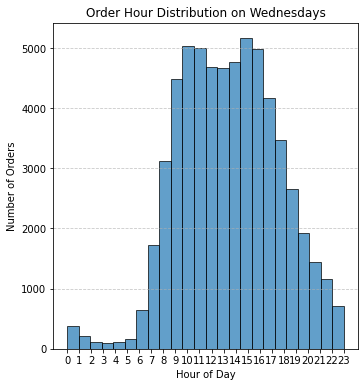

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(wednesday_data['order_hour_of_day'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Order Hour Distribution on Wednesdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

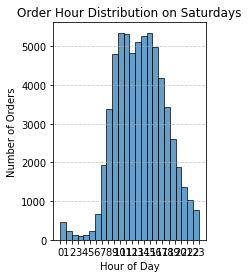

In [41]:
plt.subplot(1, 2, 2)
plt.hist(saturday_data['order_hour_of_day'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Order Hour Distribution on Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

To compare the 'order_hour_of_day' distributions on Wednesdays and Saturdays, you can create separate histograms for each day and visualize them side by side. This code separates the data for Wednesdays and Saturdays and creates side-by-side histograms for the 'order_hour_of_day' distribution on each day.

### [B2] What's the distribution for the number of orders per customer?

In [42]:
orders_path = '/datasets/instacart_orders.csv'
df_orders = pd.read_csv(orders_path, delimiter=';', header=0)
df_customer_orders = pd.merge(df_orders, df_order_products, on='order_id')
customer_order_counts = df_customer_orders.groupby('user_id')['order_id'].nunique()

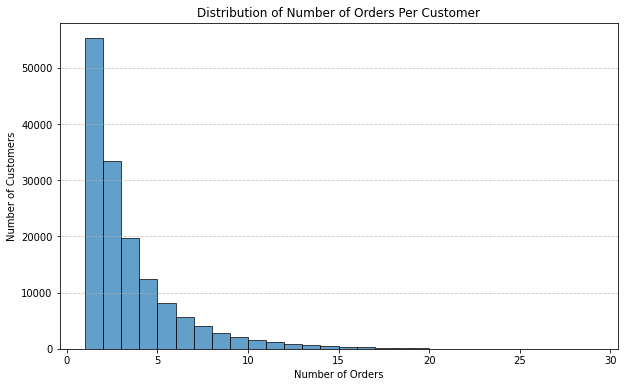

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(customer_order_counts, bins=range(1, customer_order_counts.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To analyze the distribution of the number of orders per customer, you can create a histogram showing the frequency of different order counts. This code first merges the 'orders' and 'order_products' DataFrames to obtain customer order information. It then counts the number of unique orders for each customer and creates a histogram based on these counts. 

### [B3] What are the top 20 popular products (display their id and name)?

In [44]:
df_popular_products = pd.merge(df_order_products, df_products, on='product_id')


In [45]:
product_counts = df_popular_products['product_name'].value_counts()


In [46]:
top_20_popular_products = product_counts.head(20)

In [47]:
top_20_popular_products

Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_name, dtype: int64

To find the top 20 popular products based on the number of times they appear in orders, you can analyze the 'order_products' DataFrame. This code first merges the 'order_products' and 'products' DataFrames to obtain product information. It then counts the occurrences of each product and retrieves the top 20 popular products based on the count.

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [48]:
order_products_path = '/datasets/order_products.csv'
df_order_products = pd.read_csv(order_products_path, delimiter=';', header=0)


In [49]:
items_per_order = df_order_products.groupby('order_id')['product_id'].count()


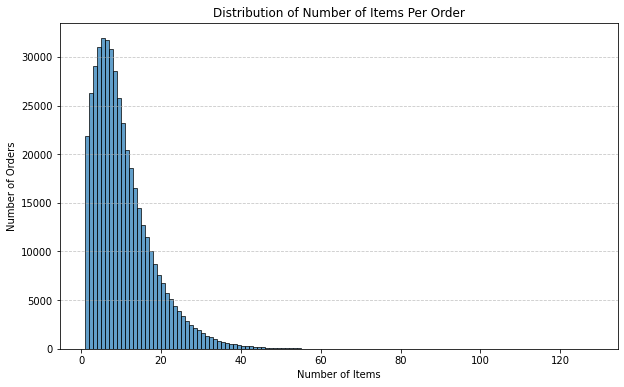

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Items Per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To analyze how many items people typically buy in one order, you can create a histogram showing the distribution of the number of items per order. This code groups the 'order_products' DataFrame by 'order_id' and counts the number of items per order. Then, it creates a histogram based on these counts.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [51]:
import pandas as pd
order_products_path = '/datasets/order_products.csv'
products_path = '/datasets/products.csv'
df_order_products = pd.read_csv(order_products_path, delimiter=';', header=0)
df_products = pd.read_csv(products_path, delimiter=';', header=0)


In [52]:
df_reordered_products = pd.merge(df_order_products, df_products, on='product_id')
reordered_products = df_reordered_products[df_reordered_products['reordered'] == 1]
reordered_product_counts = reordered_products['product_name'].value_counts()
top_20_reordered_products = reordered_product_counts.head(20)

In [53]:
top_20_reordered_products_info = df_products[df_products['product_name'].isin(top_20_reordered_products.index)][['product_id', 'product_name']]
print("Indices of top_20_reordered_products:")
print(top_20_reordered_products.index)
print("Indices of top_20_reordered_products_info:")

Indices of top_20_reordered_products:
Index(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Organic Whole Milk', 'Large Lemon', 'Organic Raspberries',
       'Strawberries', 'Limes', 'Organic Yellow Onion', 'Organic Garlic',
       'Organic Zucchini', 'Cucumber Kirby', 'Organic Fuji Apple',
       'Apple Honeycrisp Organic', 'Organic Blueberries', 'Organic Lemon',
       'Organic Half & Half'],
      dtype='object')
Indices of top_20_reordered_products_info:


In [54]:
print(top_20_reordered_products_info.index)
top_20_reordered_products_info = top_20_reordered_products_info.set_index('product_id')
print("Top 20 Reordered Products:")
print(top_20_reordered_products_info)

Int64Index([ 5875,  8276, 13175, 16796, 21136, 21902, 22934, 24851, 24963,
            26208, 27844, 27965, 28203, 39274, 45006, 47208, 47625, 47765,
            49234, 49682],
           dtype='int64')
Top 20 Reordered Products:
                        product_name
product_id                          
5876                   Organic Lemon
8277        Apple Honeycrisp Organic
13176         Bag of Organic Bananas
16797                   Strawberries
21137           Organic Strawberries
21903           Organic Baby Spinach
22935           Organic Yellow Onion
24852                         Banana
24964                 Organic Garlic
26209                          Limes
27845             Organic Whole Milk
27966            Organic Raspberries
28204             Organic Fuji Apple
39275            Organic Blueberries
45007               Organic Zucchini
47209           Organic Hass Avocado
47626                    Large Lemon
47766                Organic Avocado
49235            Organic Half 

To find the top 20 items that are reordered most frequently, you can analyze the 'order_products' DataFrame and consider the 'reordered' column. This code first merges the 'order_products' and 'products' DataFrames to obtain product information. It then filters the DataFrame to consider only reordered products and counts their occurrences. Finally, it retrieves the top 20 reordered products along with their product IDs.

### [C3] For each product, what proportion of its orders are reorders?

In [55]:
product_reorder_proportion = df_order_products.groupby('product_id')['reordered'].mean()

In [56]:
print("Product ID, Reorder Proportion")

Product ID, Reorder Proportion


In [57]:
print(product_reorder_proportion)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


### [C4] For each customer, what proportion of their products ordered are reorders?

In [58]:
df_orders = pd.read_csv(orders_path, delimiter=';', header=0)

df_customer_orders = pd.merge(df_order_products, df_orders, on='order_id')


In [59]:
customer_reorder_proportion = df_customer_orders.groupby('user_id')['reordered'].mean()

In [60]:
customer_reorder_proportion

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [61]:
import pandas as pd
order_products_path = '/datasets/order_products.csv'
products_path = '/datasets/products.csv'


In [62]:
df_order_products = pd.read_csv(order_products_path, delimiter=';', header=0)
df_products = pd.read_csv(products_path, delimiter=';', header=0)

In [63]:
df_first_cart_items = pd.merge(df_order_products, df_products, on='product_id')
first_cart_items_counts = df_first_cart_items[df_first_cart_items['add_to_cart_order'] == 1]['product_id'].value_counts()


To find the top 20 items that people put in their carts first, you can analyze the 'order_products' DataFrame and consider the 'add_to_cart_order' column. This code first merges the 'order_products' and 'products' DataFrames to obtain product information. It then filters the DataFrame to consider only items added to the cart first (where 'add_to_cart_order' is 1) and counts their occurrences. Finally, it retrieves the top 20 items added to the cart first along with their product IDs.

In [64]:
top_20_first_cart_items_info = df_products[df_products['product_id'].isin(first_cart_items_counts.head(20).index)][['product_id', 'product_name']]

In [65]:
print("Top 20 Items Added to Cart First:")

Top 20 Items Added to Cart First:


In [66]:
print(top_20_first_cart_items_info)

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half
